In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load your CSV
data = pd.read_csv("/Users/eyash.p24/Desktop/MUJ/CVPR/GroundWater/Data/final/gw35.csv")
data.head()

,Potential,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,C_10,C_11,C_12,C_13,C_14,C_15,C_16
0,0,284.0,0.0,2,7168296,103,6,50,0.118554,89.995636,1,2,-4.850777,216,4108190,309,3
1,0,286.0,0.0,2,3360678,103,14,50,0.143351,89.993378,1,2,-7.794346,214,3332275,273,3
2,0,259.0,0.0,2,13978854,103,14,48,0.043402,89.978165,1,1,-6.198686,177,3332275,223,3
3,0,NaN,0.0,2,167441,103,6,42,0.086613,89.971527,4,1,-4.836854,183,17577058,175,4
4,0,220.0,0.0,2,57532,103,14,55,0.074832,89.982346,1,2,-5.013441,195,3332275,253,3


In [3]:
data.columns

Index(['Potential', 'C_1', 'C_2', 'C_3', 'C_4', 'C_5', 'C_6', 'C_7', 'C_8',
       'C_9', 'C_10', 'C_11', 'C_12', 'C_13', 'C_14', 'C_15', 'C_16'],
      dtype='object')

In [4]:
data.isna().sum()

Potential    0
C_1          1
C_2          0
C_3          0
C_4          0
C_5          0
C_6          0
C_7          0
C_8          0
C_9          0
C_10         0
C_11         0
C_12         0
C_13         0
C_14         0
C_15         0
C_16         0
dtype: int64

In [5]:
data = data.interpolate(method='spline', order=3)  

In [6]:
data.isna().sum()

Potential    0
C_1          0
C_2          0
C_3          0
C_4          0
C_5          0
C_6          0
C_7          0
C_8          0
C_9          0
C_10         0
C_11         0
C_12         0
C_13         0
C_14         0
C_15         0
C_16         0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Potential  52 non-null     int64  
 1   C_1        52 non-null     float64
 2   C_2        52 non-null     float64
 3   C_3        52 non-null     int64  
 4   C_4        52 non-null     int64  
 5   C_5        52 non-null     int64  
 6   C_6        52 non-null     int64  
 7   C_7        52 non-null     int64  
 8   C_8        52 non-null     float64
 9   C_9        52 non-null     float64
 10  C_10       52 non-null     int64  
 11  C_11       52 non-null     int64  
 12  C_12       52 non-null     float64
 13  C_13       52 non-null     int64  
 14  C_14       52 non-null     int64  
 15  C_15       52 non-null     int64  
 16  C_16       52 non-null     int64  
dtypes: float64(5), int64(12)
memory usage: 7.0 KB


In [8]:
data.describe()

,Potential,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,C_10,C_11,C_12,C_13,C_14,C_15,C_16
count,52.000000,52.000000,52.000000,52.000000,5.200000e+01,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,5.200000e+01,52.000000,52.000000
mean,0.653846,242.714922,0.000176,2.096154,6.689931e+06,117.211538,6.615385,59.730769,0.059341,84.843489,1.442308,1.711538,-5.201751,180.769231,7.428207e+06,339.365385,2.865385
std,0.480384,37.209931,0.000434,0.408710,6.710410e+06,32.976127,5.126455,9.491204,0.058506,20.948293,0.937528,0.824539,3.268545,16.297017,4.248531e+06,79.563769,0.741722
min,0.000000,174.000000,0.000000,2.000000,5.876000e+03,102.000000,1.000000,39.000000,0.000000,1.000000,1.000000,1.000000,-7.818658,138.000000,3.332275e+06,174.000000,1.000000
25%,0.000000,213.750000,0.000000,2.000000,6.659600e+04,103.000000,2.000000,52.750000,0.012181,89.968170,1.000000,1.000000,-7.219424,171.000000,3.332275e+06,268.750000,3.000000
50%,1.000000,243.500000,0.000000,2.000000,3.360678e+06,103.000000,6.000000,60.000000,0.038624,89.978165,1.000000,2.000000,-6.074686,181.000000,6.093657e+06,376.500000,3.000000
75%,1.000000,268.000000,0.000000,2.000000,1.397885e+07,103.000000,14.000000,67.000000,0.089036,89.987547,1.000000,2.000000,-4.847296,189.000000,1.079390e+07,404.750000,3.000000
max,1.000000,322.000000,0.002282,4.000000,1.397885e+07,245.000000,17.000000,81.000000,0.274925,89.995636,4.000000,4.000000,5.210842,216.000000,1.757706e+07,421.000000,4.000000


In [9]:
data['Potential'].value_counts()

Potential
1    34
0    18
Name: count, dtype: int64

In [10]:
columns = ['Altitude', "Drainage"]

52

In [11]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Potential']) 
y = data['Potential']                

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.4, random_state=42)
X_train.shape, X_test.shape

((31, 16), (21, 16))

In [12]:
y_train.value_counts()

Potential
1    20
0    11
Name: count, dtype: int64

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred_rf = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[ 7  0]
 [ 2 12]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.86      0.92        14

    accuracy                           0.90        21
   macro avg       0.89      0.93      0.90        21
weighted avg       0.93      0.90      0.91        21



0.9047619047619048


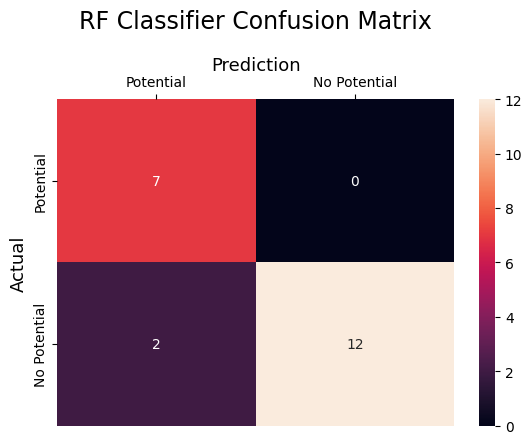

In [16]:
cm = confusion_matrix(y_test,y_pred_rf)
print(accuracy_score(y_test, y_pred_rf))
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Potential','No Potential'],
            yticklabels=['Potential','No Potential'])
plt.ylabel('Actual', fontsize=13)
plt.title('RF Classifier Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
# plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

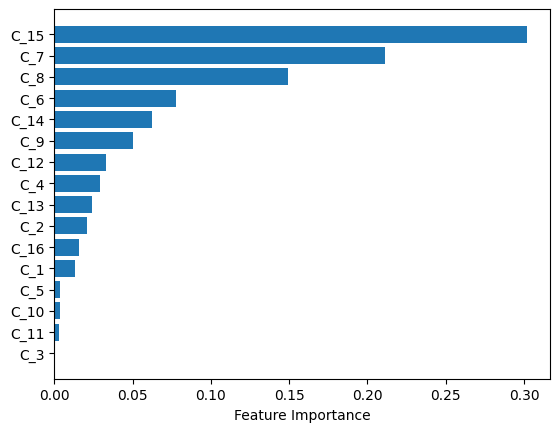

In [43]:
import matplotlib.pyplot as plt

importances = clf.feature_importances_
feature_names = X.columns
sorted_idx = importances.argsort()

plt.barh(range(len(importances)), importances[sorted_idx])
plt.yticks(range(len(importances)), feature_names[sorted_idx])
plt.xlabel("Feature Importance")
plt.show()


In [46]:
range(len(importances)), importances[sorted_idx]

(range(0, 16),
 array([0.        , 0.00323057, 0.00384923, 0.00399096, 0.01297926,
        0.01561669, 0.02095032, 0.02442044, 0.02912673, 0.03309986,
        0.05035969, 0.06261502, 0.07763021, 0.14922113, 0.21129777,
        0.30161211]))

In [47]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("Cross-val accuracy:", scores.mean())

Cross-val accuracy: 0.9418181818181818


/opt/miniconda3/envs/envTorch/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


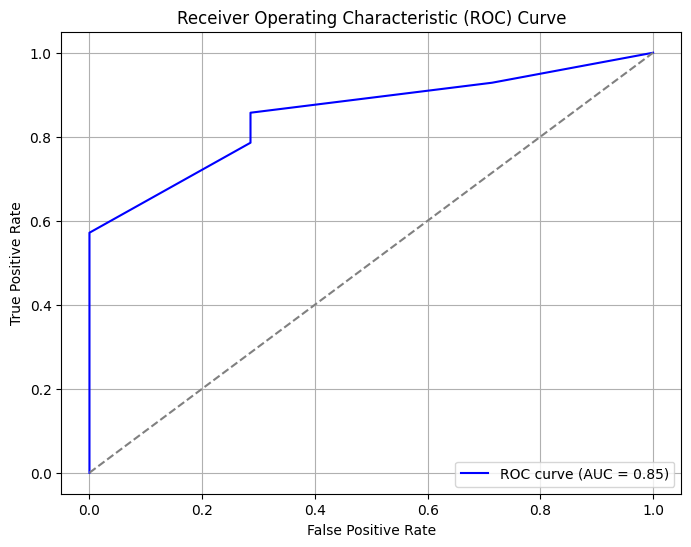

In [48]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class (label=1)
y_proba = clf.predict_proba(X_test_scaled)[:, 1]  # assuming label 1 is 'Potential'

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [20]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.8571428571428571


In [51]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.92      0.86      0.89        14

    accuracy                           0.86        21
   macro avg       0.84      0.86      0.84        21
weighted avg       0.87      0.86      0.86        21



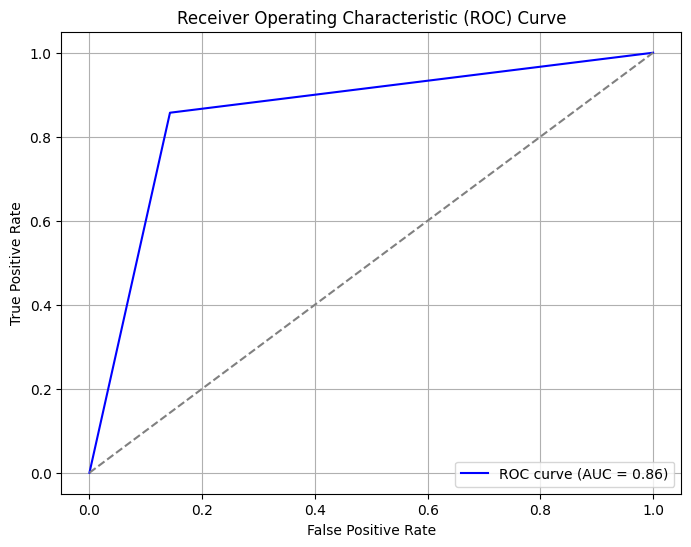

In [21]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gb)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [53]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))

AdaBoost Accuracy: 0.8571428571428571


In [54]:
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.92      0.86      0.89        14

    accuracy                           0.86        21
   macro avg       0.84      0.86      0.84        21
weighted avg       0.87      0.86      0.86        21



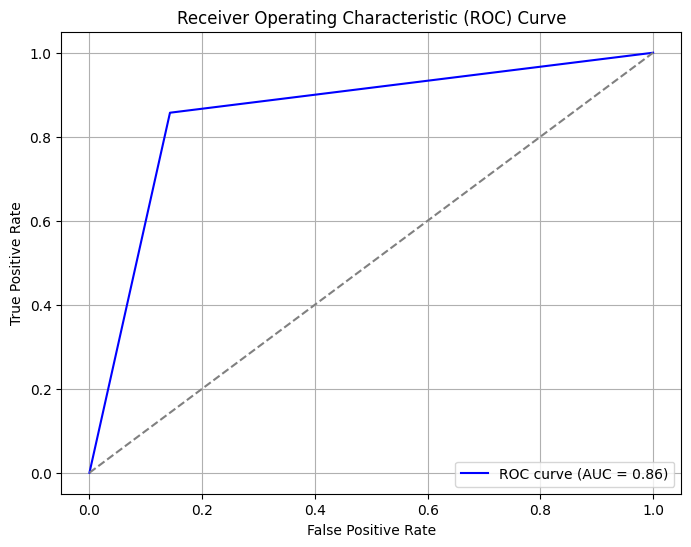

In [56]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ada)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [24]:
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
dt_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

dt_gini.fit(X_train, y_train)
dt_en.fit(X_train, y_train)

y_pred_gini = dt_gini.predict(X_test)
y_pred_en = dt_en.predict(X_test)

# Decision Tree Gini Impurity
print('Decision Tree Gini Impurity')
print('Accuracy: ', accuracy_score(y_test, y_pred_gini))

# Decision Tree Entropy
print('Decision Tree Entropy')
print('Accuracy: ', accuracy_score(y_test, y_pred_en))

Decision Tree Gini Impurity
Accuracy:  0.8571428571428571
Decision Tree Entropy
Accuracy:  0.8571428571428571


In [57]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.92      0.86      0.89        14

    accuracy                           0.86        21
   macro avg       0.84      0.86      0.84        21
weighted avg       0.87      0.86      0.86        21



In [58]:
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.92      0.86      0.89        14

    accuracy                           0.86        21
   macro avg       0.84      0.86      0.84        21
weighted avg       0.87      0.86      0.86        21



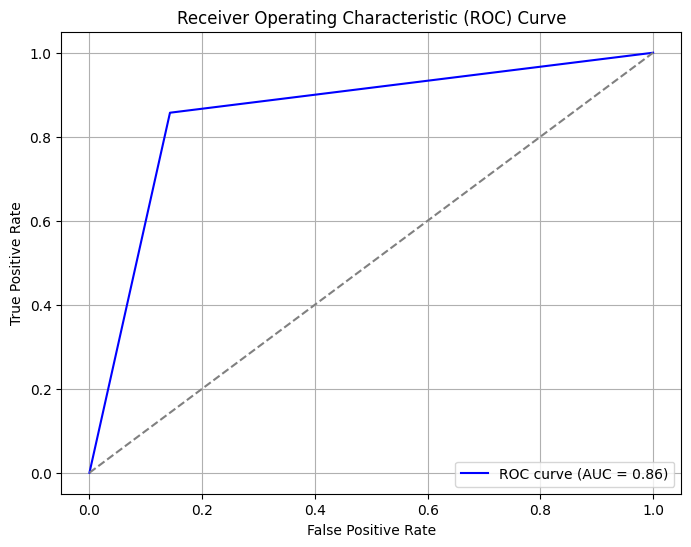

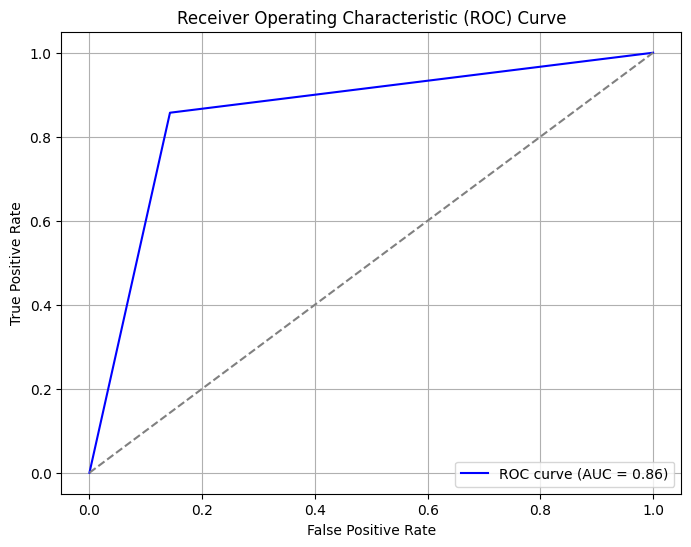

In [25]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gini)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_en)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

0.6190476190476191


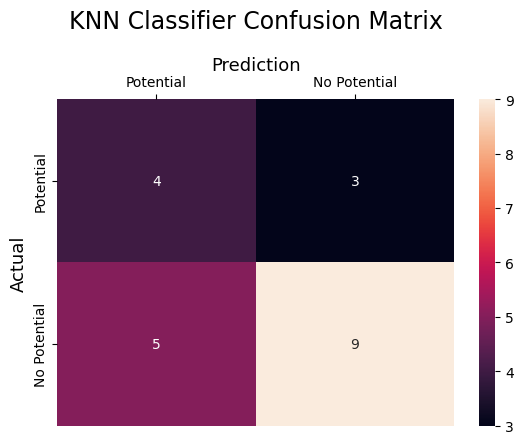

In [26]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

model_knn = KNeighborsClassifier(n_neighbors=9)
model_knn.fit(X_train, y_train)
# prediction
y_pred_knn = model_knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred_knn)
print(accuracy_score(y_test, y_pred_knn))
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Potential','No Potential'],
            yticklabels=['Potential','No Potential'])
plt.ylabel('Actual', fontsize=13)
plt.title('KNN Classifier Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
# plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

In [59]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.44      0.57      0.50         7
           1       0.75      0.64      0.69        14

    accuracy                           0.62        21
   macro avg       0.60      0.61      0.60        21
weighted avg       0.65      0.62      0.63        21



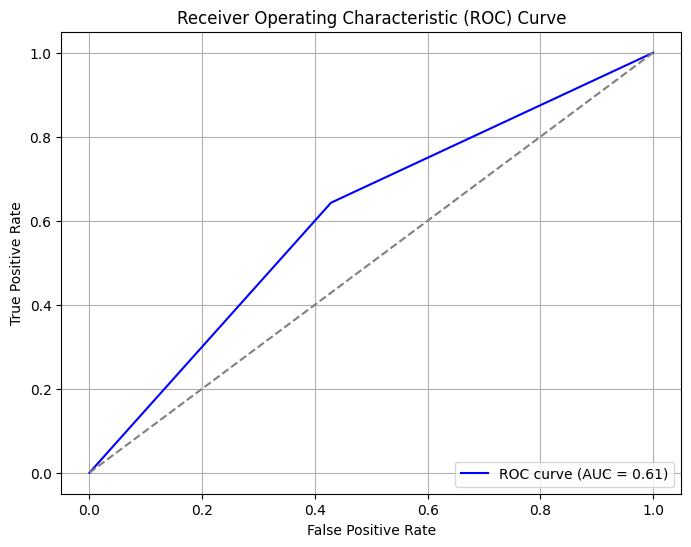

In [27]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

0.9047619047619048


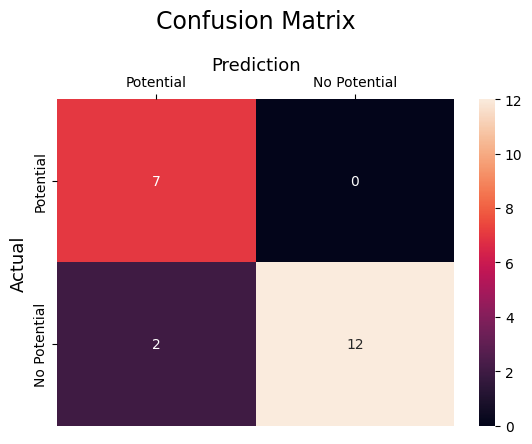

In [28]:
model = LogisticRegression()
model.fit(X_train, y_train)
# prediction
y_pred_lg = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred_lg)
print(accuracy_score(y_test, y_pred_lg))
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Potential','No Potential'],
            yticklabels=['Potential','No Potential'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
# plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

In [60]:
print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.86      0.92        14

    accuracy                           0.90        21
   macro avg       0.89      0.93      0.90        21
weighted avg       0.93      0.90      0.91        21



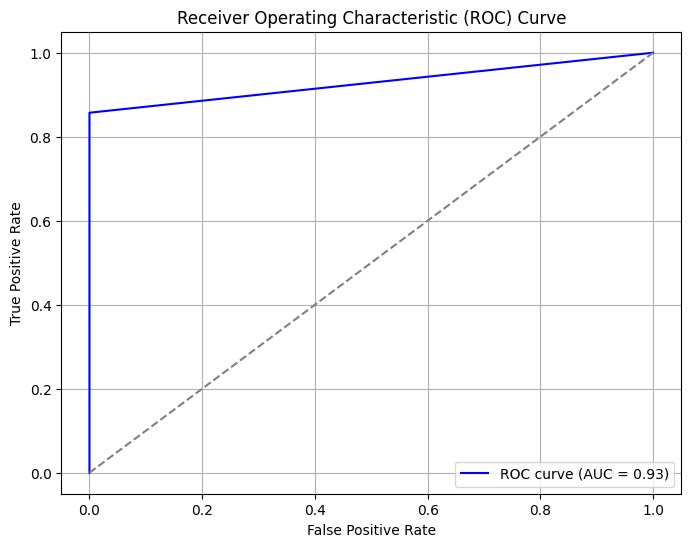

In [29]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lg)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Accuracy score:  0.6190476190476191


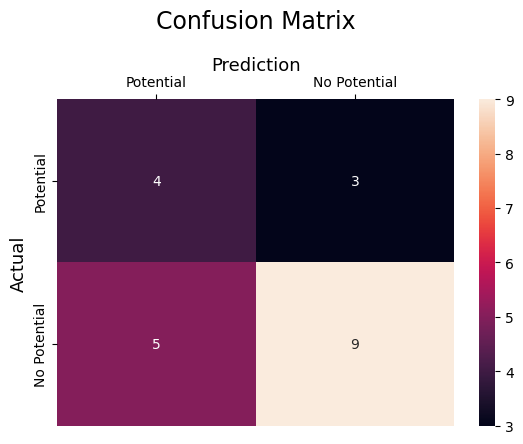

In [30]:
from sklearn.svm import SVC
model=SVC() 
model.fit(X_train,y_train)
y_pred_svc=model.predict(X_test)
print("Accuracy score: ",accuracy_score(y_test, y_pred_svc))
cm = confusion_matrix(y_test, y_pred_svc)
# sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Potential','No Potential'],
            yticklabels=['Potential','No Potential'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
# plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

In [61]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.44      0.57      0.50         7
           1       0.75      0.64      0.69        14

    accuracy                           0.62        21
   macro avg       0.60      0.61      0.60        21
weighted avg       0.65      0.62      0.63        21



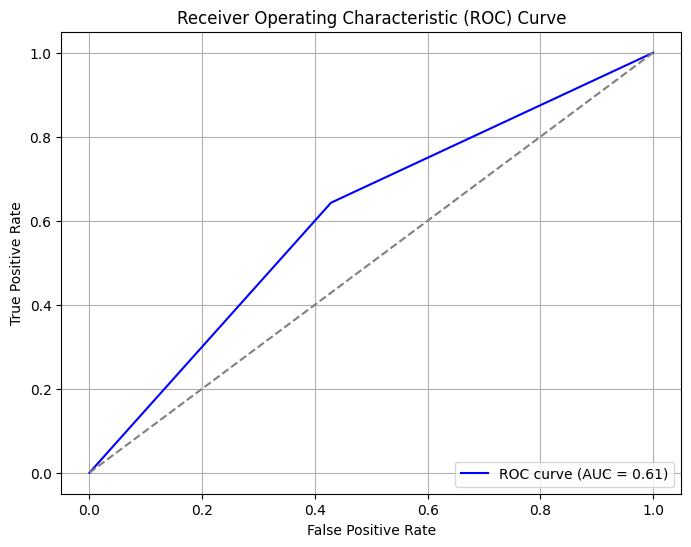

In [31]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svc)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [32]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB

gnb = GaussianNB()
bnb = BernoulliNB()


gnb.fit(X_train, y_train)
bnb.fit(X_train, y_train)


y_pred_gnb = gnb.predict(X_test)
y_pred_bnb = bnb.predict(X_test)

from sklearn.metrics import accuracy_score

list_nb = ['GaussianNB', 'BernoulliNB']
list_nb_pred = [y_pred_gnb,y_pred_bnb]

for nb, nb_pred in zip(list_nb,list_nb_pred):
    print(f"Accuracy of {nb}: ", accuracy_score(y_test, nb_pred))


Accuracy of GaussianNB:  0.7142857142857143
Accuracy of BernoulliNB:  0.6666666666666666


In [62]:
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.56      0.71      0.62         7
           1       0.83      0.71      0.77        14

    accuracy                           0.71        21
   macro avg       0.69      0.71      0.70        21
weighted avg       0.74      0.71      0.72        21



In [63]:
print(classification_report(y_test, y_pred_bnb))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.67      1.00      0.80        14

    accuracy                           0.67        21
   macro avg       0.33      0.50      0.40        21
weighted avg       0.44      0.67      0.53        21



/opt/miniconda3/envs/envTorch/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/envTorch/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/envTorch/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

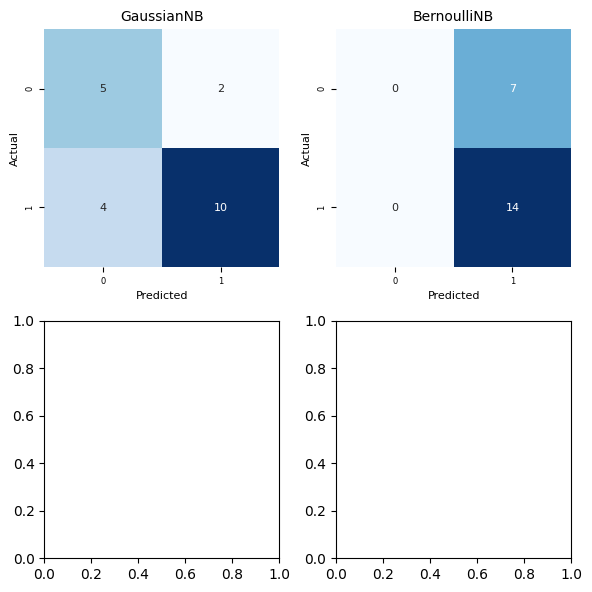

In [33]:
from sklearn.metrics import confusion_matrix
fig, axes = plt.subplots(2, 2, figsize=(6, 6))  

for i, (nb, pred) in enumerate(zip(list_nb, list_nb_pred)):
    cm = confusion_matrix(y_test, pred)
    ax = axes[i // 2, i % 2]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False, annot_kws={"size": 8})  #
    ax.set_title(f'{nb}', fontsize=10)  
    ax.set_xlabel('Predicted', fontsize=8)
    ax.set_ylabel('Actual', fontsize=8)
    ax.tick_params(axis='both', labelsize=6)  

plt.tight_layout(pad=1.0) 
plt.show()

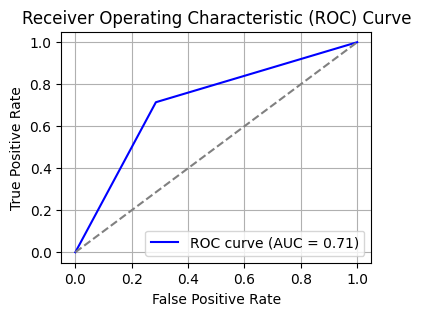

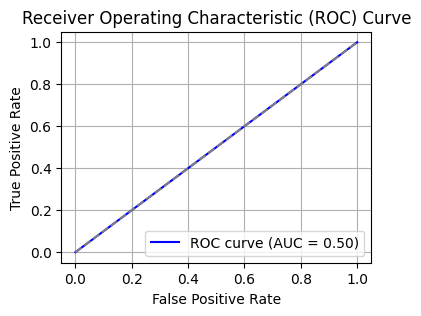

In [34]:
list_nb = ['GaussianNB', 'BernoulliNB']
list_nb_pred = [y_pred_gnb,y_pred_bnb]
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gnb)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_bnb)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Accuracy score:  0.6666666666666666


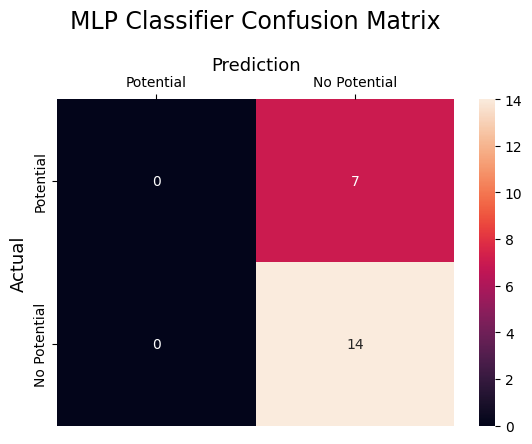

In [35]:
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)
model_mlp.fit(X_train, y_train)
y_pred_mlp = model_mlp.predict(X_test)
print("Accuracy score: ",accuracy_score(y_test, y_pred_mlp))

y_pred_mlp = model_mlp.predict(X_test)
cm = confusion_matrix(y_test,y_pred_mlp)

sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Potential','No Potential'],
            yticklabels=['Potential','No Potential'])
plt.ylabel('Actual', fontsize=13)
plt.title('MLP Classifier Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
# plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

In [64]:
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.67      1.00      0.80        14

    accuracy                           0.67        21
   macro avg       0.33      0.50      0.40        21
weighted avg       0.44      0.67      0.53        21



/opt/miniconda3/envs/envTorch/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/envTorch/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/envTorch/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

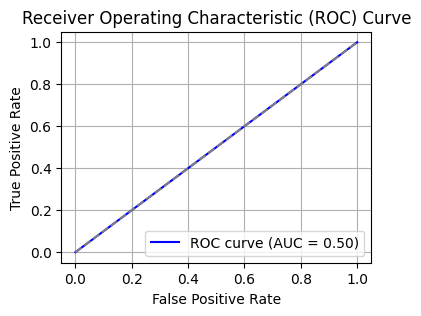

In [36]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_mlp)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
# Compute ROC curve and AUC
y_proba = clf.predict_proba(X_test_scaled)[:, 1]  # assuming label 1 is 'Potential'

# Compute ROC curve and AUC
fpr_clf, tpr_clf, _ = roc_curve(y_test, y_proba)
roc_auc_clf = auc(fpr_clf, tpr_clf)

fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

fpr_ada, tpr_ada, _ = roc_curve(y_test, y_pred_ada)
roc_auc_ada = auc(fpr_ada, tpr_ada)

fpr_gini, tpr_gini, _ = roc_curve(y_test, y_pred_gini)
roc_auc_gini = auc(fpr_gini, tpr_gini)

fpr_en, tpr_en, _ = roc_curve(y_test, y_pred_en)
roc_auc_en = auc(fpr_en, tpr_en)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_lg, tpr_lg, _ = roc_curve(y_test, y_pred_lg)
roc_auc_lg = auc(fpr_lg, tpr_lg)

fpr_svc, tpr_svc, _ = roc_curve(y_test, y_pred_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)

fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_pred_gnb)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

fpr_bnb, tpr_bnb, _ = roc_curve(y_test, y_pred_bnb)
roc_auc_bnb = auc(fpr_bnb, tpr_bnb)

fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)



# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr_clf, tpr_clf, label=f'Random Forest: {roc_auc_clf:.2f}')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boost: {roc_auc_gb:.2f}')
plt.plot(fpr_ada, tpr_ada, label=f'AdaBoost: {roc_auc_ada:.2f}')
plt.plot(fpr_gini, tpr_gini, label=f'Decision Tree (Gini Index): {roc_auc_gini:.2f}')
plt.plot(fpr_en, tpr_en, label=f'Decision Tree (Entropy): {roc_auc_en:.2f}')
plt.plot(fpr_knn, tpr_knn, label=f'K-Nearest Neighbour: {roc_auc_knn:.2f}')
plt.plot(fpr_lg, tpr_lg, label=f'Logestic Regression: {roc_auc_lg:.2f}')
plt.plot(fpr_svc, tpr_svc, label=f'Support Vector Classifier: {roc_auc_svc:.2f}')
plt.plot(fpr_gnb, tpr_gnb, label=f'Gaussian Naive Bayes: {roc_auc_gnb:.2f}')
plt.plot(fpr_bnb, tpr_bnb, label=f'Bernoulli Naive Bayes: {roc_auc_bnb:.2f}')
plt.plot(fpr_mlp, tpr_mlp, label=f'Multilayer Perceptron: {roc_auc_mlp:.2f}')


plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()




 